In [18]:
import pandas as pd
import numpy as np
import mglearn
import graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings

### 인공 신경망 2

In [19]:
cancer = load_breast_cancer()

In [20]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [22]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

426
426
143
143


In [23]:
#모델 학습
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)

MLPClassifier(random_state=0)

In [24]:
print('test Accuracy: ',mlp.score(x_test, y_test))
print('train Accuracy: ',mlp.score(x_train, y_train))

test Accuracy:  0.8951048951048951
train Accuracy:  0.9295774647887324


#### MLP 정확도를 높일수 있는 방법
 - 평균 0, 분산 1을 가지도록 데이터를 스케일링 해주면 성능이 좋아질 수 있다.
 - Standard_scaler : 데이터 평균이 0 , 분산이 1이 되도록 스케일링 해주는 스케일러

In [25]:
from sklearn.preprocessing import StandardScaler
# 스케일러 정의, 학습, 데이터 변환 과정 필요

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)# 학습과 변환을 바로 할 수있는 함수
x_test_scaled = scaler.transform(x_test) # 이미 학습이 되었기 때문에 두번 학습하지않고 바로 변환

In [27]:
#모델 학습
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

c:\Users\user\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [28]:
print('test Accuracy: ',mlp.score(x_test_scaled, y_test))
print('train Accuracy: ',mlp.score(x_train_scaled, y_train))

test Accuracy:  0.972027972027972
train Accuracy:  0.9929577464788732


#### ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200)
#### reached and the optimization hasn't converged yet.
 - max_iter 값을 늘려주는게 좋다

In [31]:
#모델 학습
mlp = MLPClassifier(max_iter=1000 ,random_state=0, alpha=1)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [32]:
print('test Accuracy: ',mlp.score(x_test_scaled, y_test))
print('train Accuracy: ',mlp.score(x_train_scaled, y_train))

test Accuracy:  0.986013986013986
train Accuracy:  0.9882629107981221


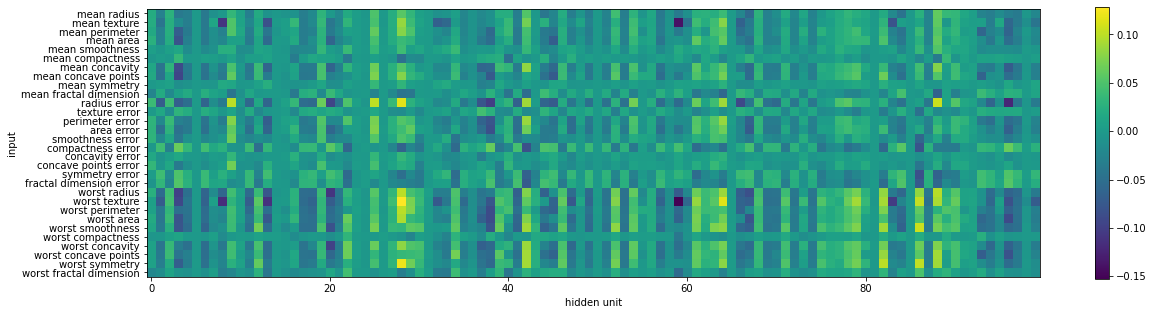

In [35]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('input')
plt.colorbar()
# 히든유닛 선언을 안해주면 x 축이 기본값 100개로 나옴
# 밝은 값일수록 학습에 가중치를 더 얻은 것(중요한 feature)